In [1]:
import pandas as pd # Data preprocessing
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Datat visualization # Missing data- Data visualization
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sk.learn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('Ignore')

ModuleNotFoundError: No module named 'xgboost'

In [2]:
df = pd.read_csv(r"C:\Users\cassa\Downloads\heart - heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


FEATURES IN A DATA-SET AND MEANING
1.age, 
2.sex,(1= MALE, 0 = FEMALE) 
3.chest pain type (cp), 
4.resting blood pressure(trestbps), 
5.serum cholesterol (chol), 
6.fasting blood sugar(fbs),
7.resting electrocardiographic results (restecg),
8.maximum heart rate achieved (thalach), 
9.exercise-induced angina (exang), 
10.ST depression induced by exercise relativeto rest (oldpeak), 
11.the slope of the peak exercise ST segment(slope), 
12.number of major vessels colored by flourosopy(ca), and 
13.thalassemia (thal).
14.target-(have heart disease or not)(1= yes, 0= NO)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<Axes: >

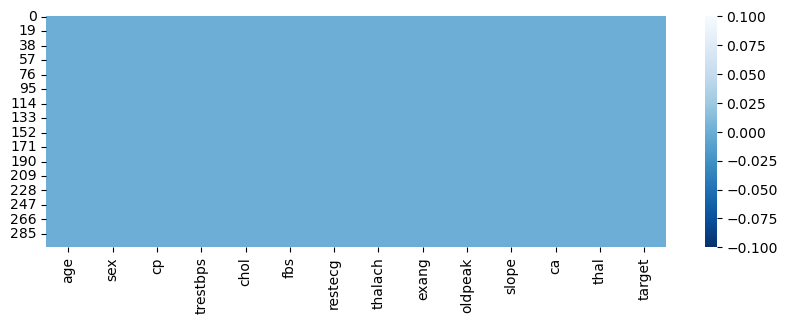

In [10]:
#Visualizing the missing data

plt.figure(figsize = (10, 3))
sns.heatmap(df.isnull(), cbar= True, cmap = "Blues_r")

EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: xlabel='thal'>

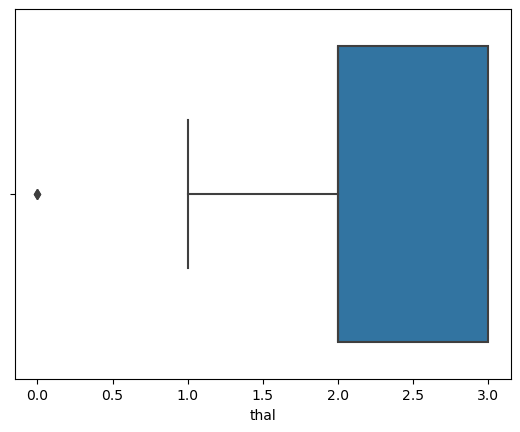

In [13]:
# Check for outliers
sns.boxplot(x = df['thal'])

<Axes: xlabel='chol'>

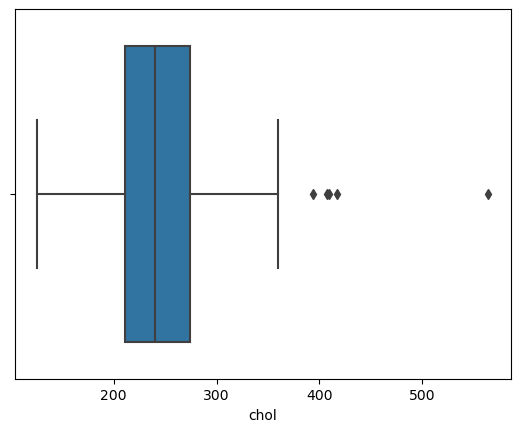

In [14]:
sns.boxplot(x = df['chol'])

Text(0.5, 1.0, 'Total Number of Patients')

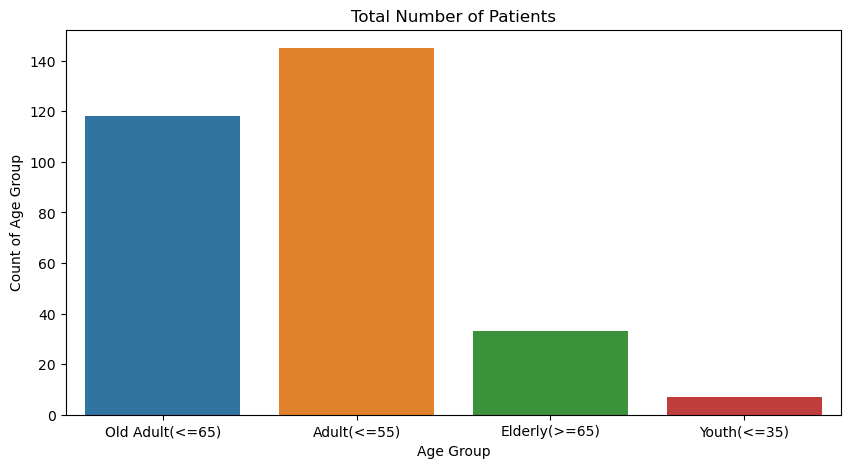

In [17]:
def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>=65)"
df['age_bracket'] = df['age'].apply(age_bracket)

# Investigating the age group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x= 'age_bracket', data= df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

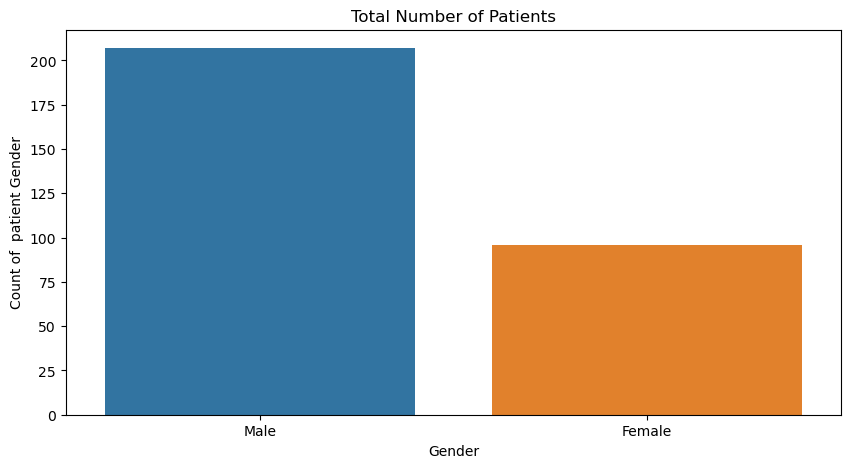

In [22]:
# data visualization of patients by sex

def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"

df['gender'] = df['sex']. apply(gender)
plt.figure(figsize = (10, 5))
sns.countplot(x = 'gender', data= df)
plt.xlabel('Gender')
plt.ylabel('Count of  patient Gender')
plt.title('Total Number of Patients')

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female


Text(0.5, 1.0, 'Total Number of Patients')

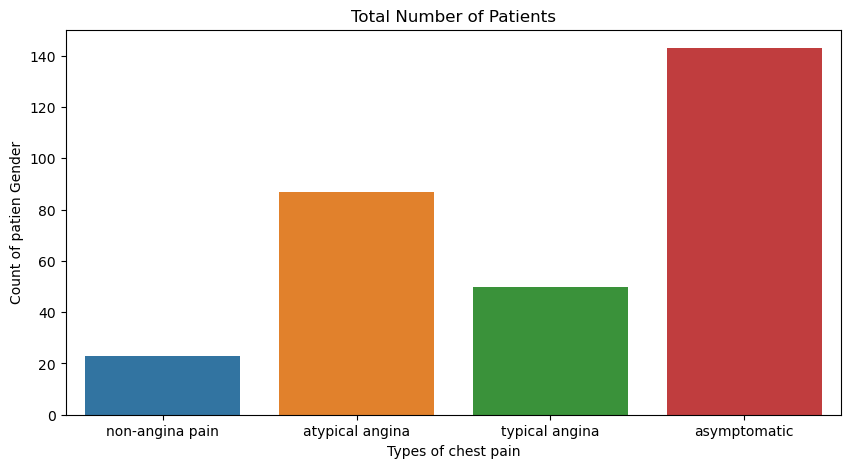

In [29]:
# data visualization for chest pain
#chest pain type: 1: typical angina 2:atypical angina 3:non-angina pain 4: asymptomatic
def chest_pain(cp):
    if cp == 1:
        return "typical angina"
    elif cp == 2:
        return "atypical angina"
    elif cp == 3:
        return "non-angina pain"
    else:
        return "asymptomatic"
df['chest_pain'] = df ['cp'].apply(chest_pain)

#Investigating the gender of patients
plt.figure(figsize = (10, 5))
sns.countplot(x = 'chest_pain', data=df)
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')


    

label
yes    165
no     138
Name: count, dtype: int64


Text(0.5, 1.0, 'Total Number of patients')

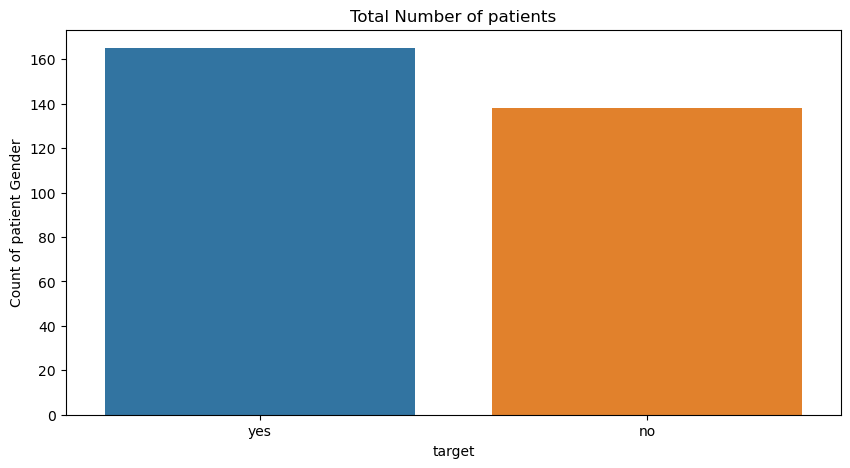

In [33]:
# data visualization
#Target- have heart disease or not (1= yes, 0=no)
def label(target):
    if target ==1:
        return "yes"
    else:
        return "no"

df['label'] = df['target'].apply(label)

#Total patients in each category
print(df["label"].value_counts())

#Investigating the gender of patients
plt.figure(figsize =(10, 5))
sns.countplot(x= 'label', data = df)
plt.xlabel('target')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of patients')
    

# BIVARIATE ANALYSIS

Text(0.5, 1.0, 'Total Number of Patients')

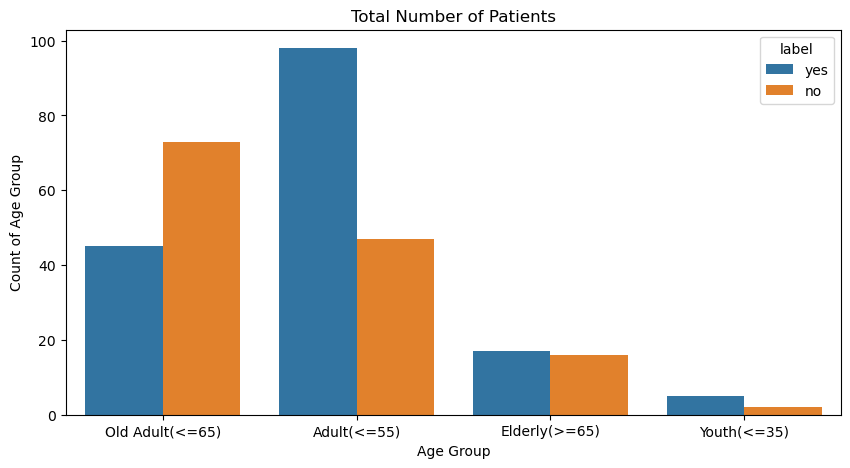

In [34]:
# Investigating the age group of patients by the target feature

plt.figure(figsize = (10,5))
sns.countplot(x= 'age_bracket', data= df, hue = 'label')
plt.xlabel('Age Group')
plt.ylabel ('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

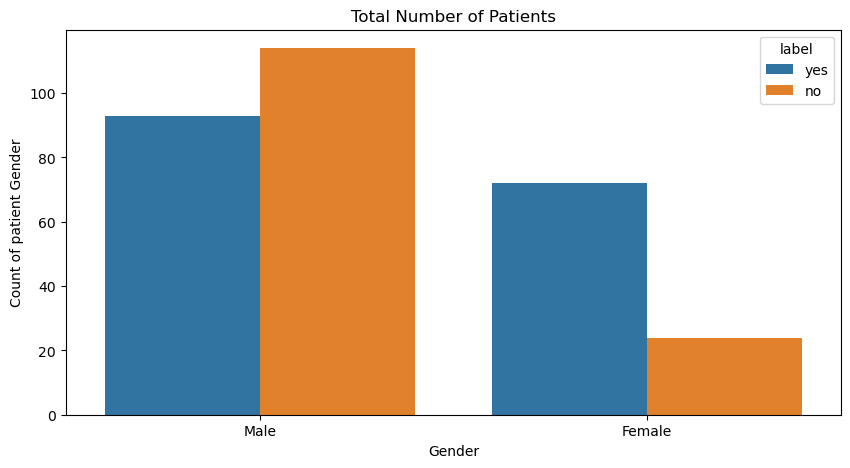

In [35]:
# investigating the gender of patients by target feature

plt.figure(figsize = (10, 5))
sns.countplot(x = 'gender', data= df, hue= 'label')
plt.xlabel('Gender')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

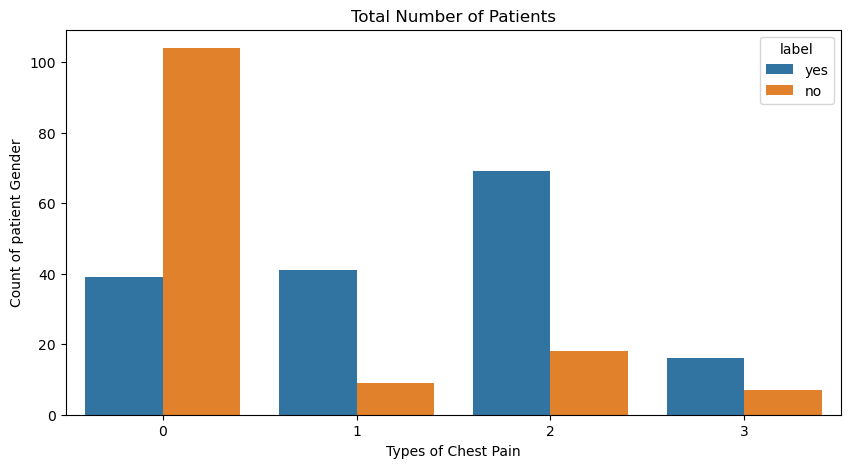

In [38]:
#Investigating the chest pain type by the target feature
plt.figure(figsize =(10,5))
sns.countplot(x ='cp', data= df, hue= 'label')
plt.xlabel('Types of Chest Pain')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

# MULTI-VARIATE ANALYSIS

In [42]:
#Correlation between other variables in the data set and target feature
plt.figure(figsize = (10, 10))

hm = sns.heatmap(df.corr(),cbar=True, annot=True, square=True, fmt='.2F', 
                 annot_kws ={'size': 10})

ValueError: could not convert string to float: 'Old Adult(<=65)'

<Figure size 1000x1000 with 0 Axes>

#DATA PRE-PROCESSING

In [45]:
# Create a copy of the data( exclude target/label alongside other columns created

df1 = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal',]]

label = df[['target']]

In [46]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [47]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [54]:
df1.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

KeyError: 'trestbps'

In [66]:
scaler = MinMaxScaler()

df1["Scaled_trestbps"] = scaler.fit_transform(df1['trestbps'].values.reshape(-1,1))
df1["Scaled_chol"] = scaler.fit_transform(df1[['chol']].values.reshape(-1,1))
df1["Scaled_thal"] = scaler.fit_transform(df1[['thal']].values.reshape(-1,1))
df1["Scaled_thalach"] = scaler.fit_transform(df1[['thalach']].values.reshape(-1,1))

df1.drop(['trestbps','chol','thal','thalach'], axis=1, inplace =True)

df1.head()

KeyError: 'trestbps'

In [67]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bracket,gender,chest_pain,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-angina pain,yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,yes


In [68]:
df1.head()

,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,Scaled_trestbps,Scaled_chol,Scaled_thal,Scaled_thalach
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


#MACHINE LEARNING


In [71]:
#Split the dataset into training and testing sets
X_train,X_test,y_train, y_test= train_test_split(df1, label, test_size=0.2, random_state=42)

In [69]:
df1.shape

(303, 13)

In [70]:
label.shape

(303, 1)

In [74]:
X_train.head(2)

,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,Scaled_trestbps,Scaled_chol,Scaled_thal,Scaled_thalach
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344


In [76]:
y_train.head(3)

,target
132,1
202,0
196,0


In [83]:
#Model building
#logistic regression
logreg =LogisticRegression()
logreg.fit(X_train, y_train)
ly_pred = logreg.predict(X_test)

print("logistic Regression")
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

logistic Regression


C:\Users\cassa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cassa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'precision_score' is not defined

In [84]:
import pandas as pd # Data preprocessing
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Datat visualization # Missing data- Data visualization
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sk.learn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('Ignore')

ModuleNotFoundError: No module named 'xgboost'

In [85]:
#logistic regression
logreg =LogisticRegression()
logreg.fit(X_train, y_train)
ly_pred = logreg.predict(X_test)

print("logistic Regression")
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

logistic Regression


C:\Users\cassa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cassa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'precision_score' is not defined